## Week 3 Logistical Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Display the first few rows of the data

In [3]:
df = pd.read_csv('data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(f'The dataset contains {df.shape[0]} rows, and {df.shape[1]} columns')

The dataset contains 303 rows, and 14 columns


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
for i in df.columns:
    print(i,len(df[i].unique()))

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


In [9]:
for i in df.columns:
# print how many features it has
    if len(df[i].unique())<10:
        print(f'{i} has {len(df[i].unique())} unique values, These are: {df[i].unique()}')


sex has 2 unique values, These are: [1 0]
cp has 4 unique values, These are: [3 2 1 0]
fbs has 2 unique values, These are: [1 0]
restecg has 3 unique values, These are: [0 1 2]
exang has 2 unique values, These are: [0 1]
slope has 3 unique values, These are: [0 2 1]
ca has 5 unique values, These are: [0 2 1 3 4]
thal has 4 unique values, These are: [1 2 3 0]
target has 2 unique values, These are: [1 0]


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
n = df[df.age <= 47].shape[0]
print('Percentage of people under the age of 42 is ', round(n/df.shape[0], 2) * 100)

Percentage of people under the age of 42 is  25.0


In [13]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [14]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

dfC = df.copy()
def changeS(sex):
    if sex == 0:
        return 'Female'
    else:
        return 'Male'


In [15]:
dfC['sex'] = dfC['sex'].apply(changeS)

In [16]:
def changeT(label):
    if label == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
dfC['target'] = dfC['target'].apply(changeT)

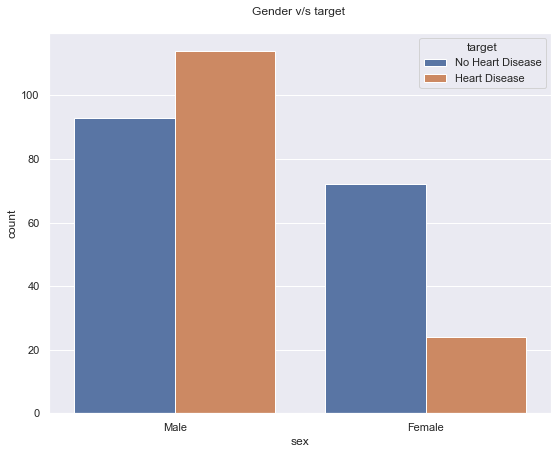

In [19]:
sns.set(rc={'figure.figsize':(9,7)})

sns.countplot(data = dfC, x='sex', hue='target')
plt.title('Gender v/s target \n')
plt.show()

In [23]:
X = df.drop('target', axis = 1)

y = df['target']

In [24]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [26]:
from sklearn import preprocessing
normalized_X_train = preprocessing.normalize(X_train)
normalized_X_test = preprocessing.normalize(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression(solver='lbfgs', max_iter=3000)
lg_model.fit(X_train,Y_train)

LogisticRegression(max_iter=3000)

In [31]:
y_pred = lg_model.predict(X_test)
actual = Y_test

In [32]:
dic = {'Actual': actual,
      'Prediction':y_pred,
      'correct_prediction':0}
result = pd.DataFrame(dic)

In [33]:
def myfunc(x,y):
    if x == y:
        return 1
    else:
        return 0
result['correct_prediction'] = result.apply(lambda x: myfunc(x.Actual, x.Prediction), axis=1)

In [34]:
result[result.correct_prediction==0]

,Actual,Prediction,correct_prediction
228,0,1,0
52,1,0,0
97,1,0,0
216,0,1,0
194,0,1,0
241,0,1,0
92,1,0,0
188,0,1,0
302,0,1,0


In [37]:
print(f'Model Accuracy on Test Data is {len(result[result.correct_prediction==1])/len(result)}')
    

Model Accuracy on Test Data is 0.8524590163934426


In [39]:
from sklearn.metrics import accuracy_score
print(f'The Model Accuracy on Testing Set is {round(accuracy_score(Y_test,y_pred),2)}')

The Model Accuracy on Testing Set is 0.85


In [41]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



[[21  6]
 [ 3 31]]


(0.0, 2.0)

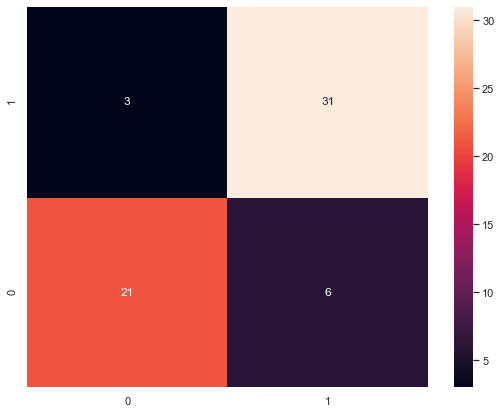

In [43]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,y_pred))


ax = sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt="d")
ax.set_ylim([0,2])

In [46]:
import pickle
# Save to file in the current working directory
pkl_filename = "pickle_lr_model.pkl"
# save your model that was created above (lg_model)
with open(pkl_filename, 'wb') as file:
    pickle.dump(lg_model, file)
    # Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    # Lets test the mode loaded from a file and check results
    score = pickle_model.score(X_test, Y_test)
    print("Test score: {0:.2f} %".format(100 * score))
    y_hat = pickle_model.predict(X_test)


Test score: 85.25 %
